<a href="https://colab.research.google.com/github/fangyiyu/Time_Series_Analysis/blob/master/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pystan==2.19.1.1 prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 179 kB 41.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639160 sha256=e76b7099f81b4e3e7677956268a154c08639172bb2c8ab544c5eb78e61c63399
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime
from prophet.plot import plot_plotly, plot_components_plotly

In [4]:
! pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/TimeSeries"

In [7]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 8.31MB/s]


In [8]:
!unzip \*.zip && rm *.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [9]:
ls

DailyDelhiClimateTest.csv  DailyDelhiClimateTrain.csv  gdrive/  sample_data/


In [10]:
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [11]:
df=df[['date','meantemp']]
df=df.rename(columns={'date':'ds','meantemp':'y'})

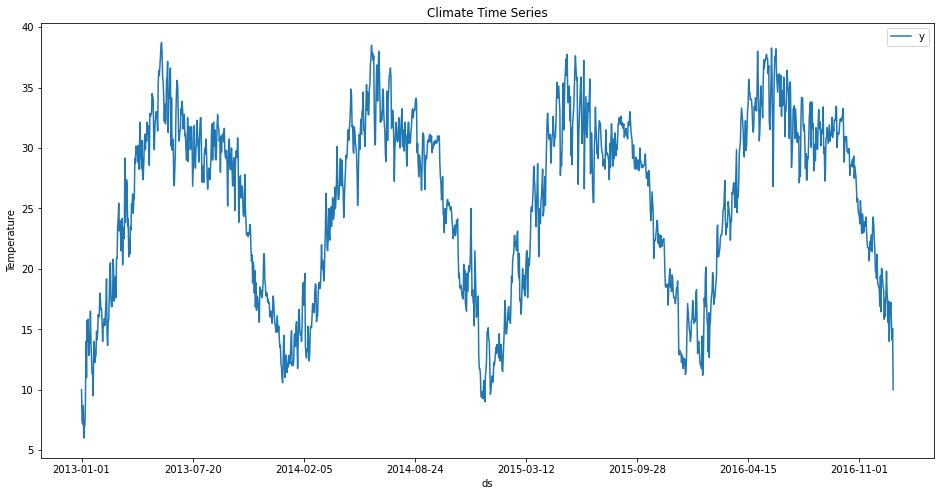

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Climate Time Series')
ax.set_ylabel('Temperature')
df.plot(kind='line', ax=ax, x='ds', y='y')

In [12]:
df_copy = df.copy()

In [13]:
#df_copy.isnull().sum()
#df_copy.dtypes

In [14]:
pd.to_datetime(df_copy.ds)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: ds, Length: 1462, dtype: datetime64[ns]

In [15]:
#df_copy.shape

In [16]:
df_copy = df_copy[:-1]

In [17]:
#df_copy.shape

In [18]:
#df_copy.tail()

In [19]:
#df_test.tail()

In [20]:
df_test = df_test[['date','meantemp']]
df_test.tail()

,date,meantemp
109,2017-04-20,34.500
110,2017-04-21,34.250
111,2017-04-22,32.900
112,2017-04-23,32.875
113,2017-04-24,32.000


In [21]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m.fit(df_copy)
future = m.make_future_dataframe(periods=114)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
1570,2017-04-20
1571,2017-04-21
1572,2017-04-22
1573,2017-04-23
1574,2017-04-24


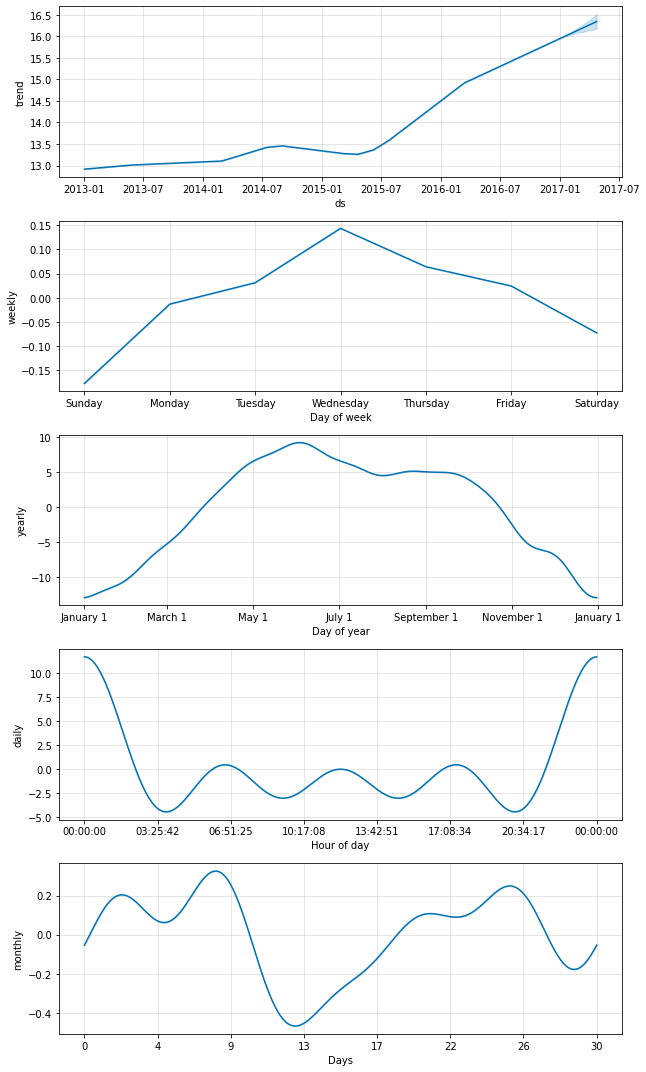

In [22]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

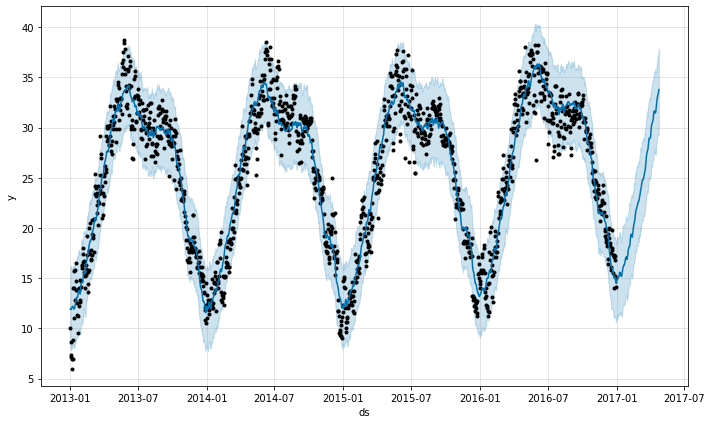

In [23]:
figure = m.plot(forecast)

In [24]:
#plot_plotly(m, forecast)

In [25]:
forecast= forecast[['ds','yhat']]

In [26]:
from sklearn.metrics import r2_score
y_true = df_test.meantemp
y_pred = forecast.yhat.tail(114)
r2_score(y_true, y_pred)

0.8154869523061125